In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



Im going to explore this problem in the following steps: 

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Main Hypothesis: Applicants with the following properties are more likely to be eligible:

1. Applicants having a credit history le
2. Applicants with higher applicant and co-applicant incomes 
3. Applicants with higher education level 
4. Properties in urban areas with high growth perspectives 
5. Younger applicants. This is because the lender is concerned with how many years the applicant has left as a salaried or working professional.


## 2. Data Exploration

In [2]:
df = pd.read_csv("data.csv") 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Categorical Variable Analysis

In [11]:
df.dtypes[df.dtypes == 'object']

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [10]:
print(f'Gender: {pd.unique(df.Gender)}')
print(f'Marrital Status: {pd.unique(df.Married)}')
print(f'Dependents: {pd.unique(df.Dependents)}')
print(f'Education: {pd.unique(df.Education)}')
print(f'Self Employed: {pd.unique(df.Self_Employed)}')
print(f'Property Area: {pd.unique(df.Property_Area)}')
print(f'Loan Status: {pd.unique(df.Loan_Status)}')

Gender: ['Male' 'Female' nan]
Marrital Status: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self Employed: ['No' 'Yes' nan]
Property Area: ['Urban' 'Rural' 'Semiurban']
Loan Status: ['Y' 'N']


Without null values


In [19]:
print(f'Gender: {df.Gender.value_counts().to_dict()}')
print(f'Marrital Status: {df.Married.value_counts().to_dict()}')
print(f'Dependents: {df.Dependents.value_counts().to_dict()}')
print(f'Education: {df.Education.value_counts().to_dict()}')
print(f'Self Employed: {df.Self_Employed.value_counts().to_dict()}')
print(f'Loan Status: {df.Loan_Status.value_counts().to_dict()}')

Gender: {'Male': 489, 'Female': 112}
Marrital Status: {'Yes': 398, 'No': 213}
Dependents: {'0': 345, '1': 102, '2': 101, '3+': 51}
Education: {'Graduate': 480, 'Not Graduate': 134}
Self Employed: {'No': 500, 'Yes': 82}
Loan Status: {'Y': 422, 'N': 192}


In [3]:
df['Loan_Count'] = 1

In [4]:
pd.pivot_table(df, values='Loan_Count', index=['Education','Married','Dependents','Credit_History'],columns=['Loan_Status'], aggfunc=np.sum)

Loan_Status                                        N     Y
Education    Married Dependents Credit_History            
Graduate     No      0          0.0             18.0   2.0
                                1.0             29.0  78.0
                     1          0.0              1.0   NaN
                                1.0              4.0   9.0
                     2          0.0              2.0   1.0
                                1.0              1.0   4.0
                     3+         1.0              1.0   3.0
             Yes     0          0.0              9.0   1.0
                                1.0             18.0  95.0
                     1          0.0             10.0   NaN
                                1.0             10.0  39.0
                     2          0.0              8.0   NaN
                                1.0              7.0  51.0
                     3+         0.0              6.0   2.0
                                1.0              3.0  20.0
Not Graduate No      0          0.0              4.0   NaN
                                1.0              8.0  23.0
                     1          0.0              1.0   NaN
                                1.0              2.0   2.0
                     3+         0.0              1.0   NaN
                                1.0              NaN   1.0
             Yes     0          0.0             11.0   NaN
                                1.0              5.0  15.0
                     1          0.0              1.0   1.0
                                1.0              1.0   9.0
                     2          0.0              3.0   NaN
                                1.0              4.0  14.0
                     3+         0.0              2.0   NaN
                                1.0              3.0   6.0

People who are not married got their loan approved more often. Even though most of the people that applied were married.
People with no dependents got their loans approved most often, but most of the applicants had no dependents

### Numerical Variable Analysis

In [11]:
# check which columns are numeric

df.dtypes[df.dtypes != 'object']

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

Loan Amount

In [16]:
print(df.LoanAmount.describe())

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


/home/atlask/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/atlask/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

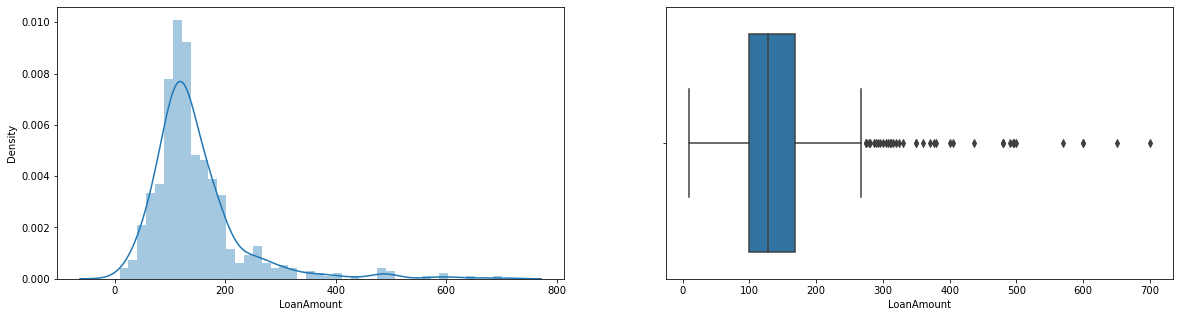

In [17]:
# Applicant and co applicant income distribution
fig, axs = plt.subplots(ncols=2,figsize=(20,5))

x1 = df.LoanAmount
x2 = df.LoanAmount

sns.distplot(x1, ax=axs[0])
sns.boxplot(x2, ax=axs[1])

Loan Amount Term

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


<AxesSubplot:xlabel='Loan_Amount_Term'>

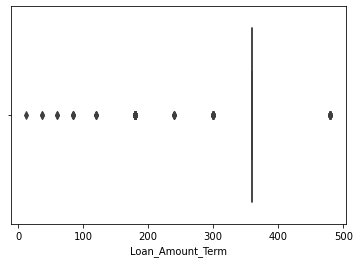

In [7]:
print(df.Loan_Amount_Term.describe())
sns.boxplot(df.Loan_Amount_Term)

As you can see, majority of applicants requested the loan for a period of 360 months (30 years). This column is porbably of little use to us since the value is fairly constant.
 

Credit History


In [28]:
print(f'Have credit history: {len(df[df.Credit_History == 1])}')
print(f'Dont have credit history: {len(df[df.Credit_History == 0])}')
print(f'Null: {df.Credit_History.isnull().sum()}')

Have credit history: 475
Dont have credit history: 89
Null: 50


Applicant and Coapplicant Income

In [6]:
# Applicant Income Dist
print(df.ApplicantIncome.mean())
print(df.ApplicantIncome.median())

5403.459283387622
3812.5


In [7]:
# Coapplicant Income Dist
print(df.CoapplicantIncome.mean())
print(df.CoapplicantIncome.median())

1621.245798027101
1188.5


Looks like most of the applicants have an Income of less than 10,000 dollars per month. There are a number of applicants with an income ranging from 10000 to 85k per month. The higher the value, the more likely the probability of having an outlier due to error in the data. Afterall, a person with 85k rent per month doesnt need a loan to purchase a house!

Data is right skewed for districbutions of Applicant Income and Coapplicant Income, meaning that mean is bigger than median and mode. This is due to the outliers as well as the people who have a siginificantly higher income than the rest of the applicants. Causing the mean to increase. 


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

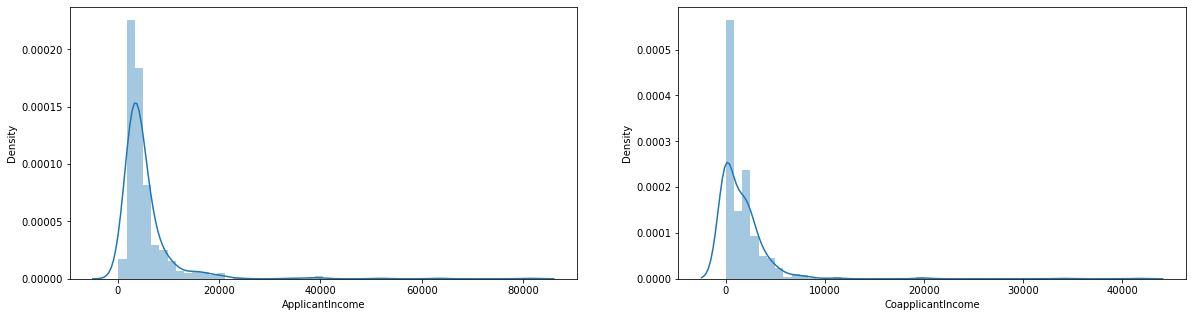

In [34]:
# Applicant and co applicant income distribution
# 
x1 = df.ApplicantIncome
x2 = df.CoapplicantIncome
fig, axs = plt.subplots(ncols=2,figsize=(20,5))

sns.distplot(x1, ax=axs[0])
sns.distplot(x2, ax=axs[1])

<AxesSubplot:xlabel='CoapplicantIncome'>

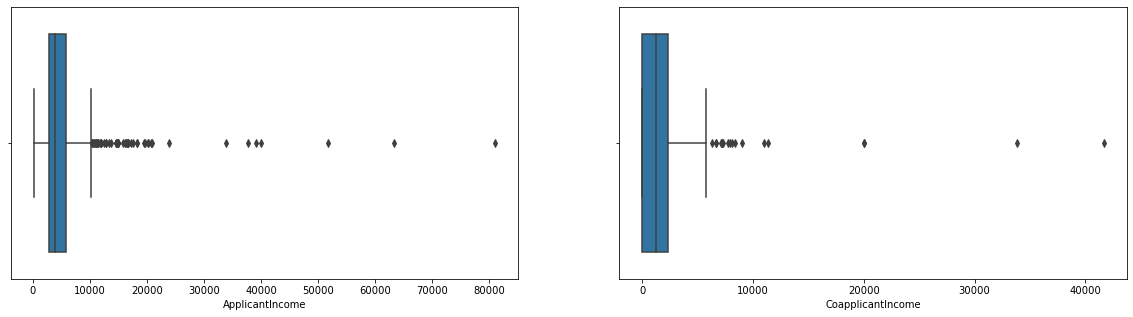

In [33]:
# Applicant and co applicant income distribution
x1 = df.ApplicantIncome
x2 = df.CoapplicantIncome
fig, axs = plt.subplots(ncols=2,figsize=(20,5))

sns.boxplot(x1, ax=axs[0])
sns.boxplot(x2, ax=axs[1])

Distribution of income segregated by `Education`

In [13]:
Graduated = df[df.Education == 'Graduate']
notGraduated = df[df.Education == 'Not Graduate']

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

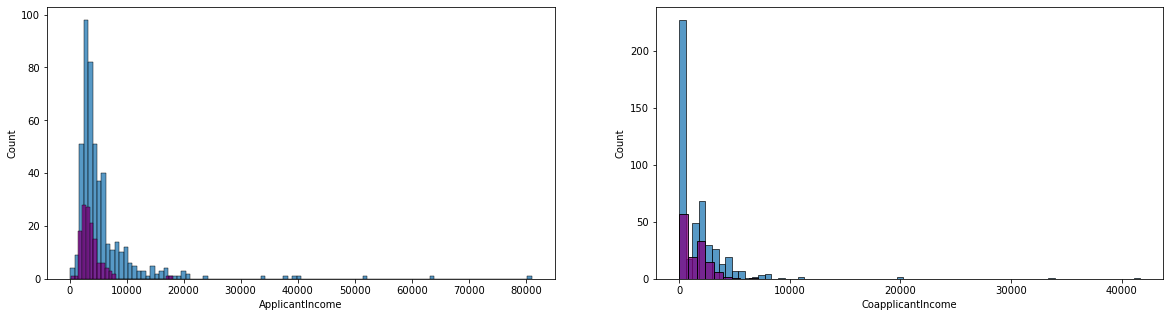

In [14]:
# Applicant and co applicant income distribution based on education
x1 = Graduated.ApplicantIncome
x2 = notGraduated.ApplicantIncome
x3 = Graduated.CoapplicantIncome
x4 = notGraduated.CoapplicantIncome

fig, axs = plt.subplots(ncols=2,figsize=(20,5))

sns.histplot(x1, ax=axs[0])
sns.histplot(x2, ax=axs[0],color='purple')

sns.histplot(x3, ax=axs[1])
sns.histplot(x4, ax=axs[1],color='purple')

As you can see, there is a correlation between education level and income. In other words, the range of income for people who did not graduate high school is much lower than those that did

## 3. Data Cleaning

### Imputing Missing Values

Many columns have missing values. Moreover, the Loan_Amount_Term is 0 in some rows, which does not make sense.


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing missing values for categorical variables:


- Use mode to impute missing values

### Extreme values
For the loan amount where there are some extreme values, it is helpful to use a log transformation.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

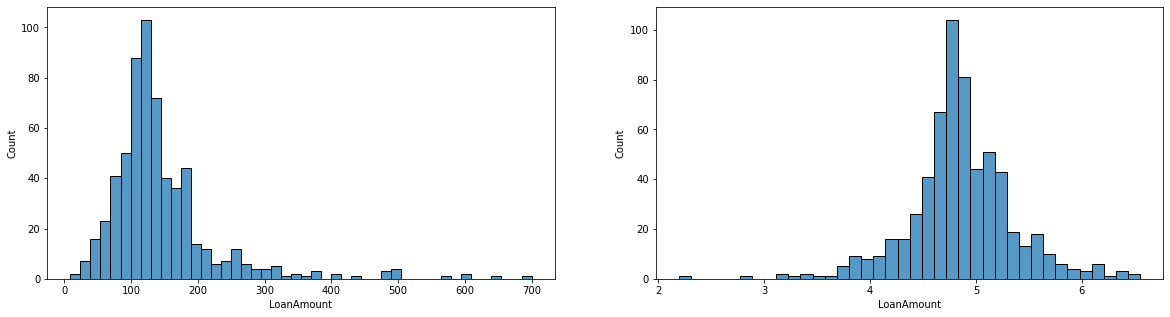

In [311]:
# Applicant and co applicant income distribution
fig, axs = plt.subplots(ncols=2,figsize=(20,5))

x1 = df.LoanAmount
x2 = np.log(df.LoanAmount)

sns.histplot(x1, ax=axs[0])
sns.histplot(x2, ax=axs[1])

The Actual data cleaning and feature engineering is done in the modeling notebook